## ARIMA Results Exploration

The purpose of this notebook is to compare the known ("$y$") catdef data and compare it to the predictions made from the arima models/predcitions ("$\hat{y}$").

### STEP 1.  Load in the Pickle Data To Obtain Reference Catdef Data

In [1]:
import pandas as pd
import numpy as np
import pickle
import math

In [2]:
objects = []
with (open("all_data.pkl", "rb")) as openfile:
    while True:
        try:
            objects.append(pickle.load(openfile))
        except EOFError:
            break

In [4]:
pdata.head()

,Year,Month,SCA,Landsat_Image,BW_SCA_Image,Color_SCA_Image,catdef,rzexc,evap,srfexc,sfmc,capac,Snowf,Rainf,prmc,sumwesn,runoff,Tair,RainfC,rzmc
0,2003,1,294585,<PIL.Image.Image image mode=RGB size=480x480 a...,<PIL.Image.Image image mode=1 size=570x660 at ...,<PIL.Image.Image image mode=RGBA size=570x660 ...,"[[nan, nan, nan, 38.347, 58.863, 72.956, 104.4...","[[nan, nan, nan, 2.8021, 3.8333, 3.6458, 2.835...","[[nan, nan, nan, 1.9842, 1.8075, 1.1867, 1.024...","[[nan, nan, nan, -0.25451, -0.26739, -0.30132,...","[[nan, nan, nan, 0.45009, 0.41456000000000004,...","[[nan, nan, nan, 0.07147200000000001, 0.069579...","[[nan, nan, nan, 0.0, 4.0366999999999995e-05, ...","[[nan, nan, nan, 9.8164, 9.1992, 7.3516, 5.421...","[[nan, nan, nan, 0.46491000000000005, 0.42658,...","[[nan, nan, nan, 1.9386e-05, 0.00053811, 0.009...","[[nan, nan, nan, 7.8125, 7.9023, 6.6211, 3.629...","[[nan, nan, nan, 284.14, 283.06, 281.55, 281.1...","[[nan, nan, nan, 0.12506, 0.12585, 0.10165, 0....","[[nan, nan, nan, 0.47278000000000003, 0.442019..."
1,2003,2,19185627,<PIL.Image.Image image mode=RGB size=480x480 a...,<PIL.Image.Image image mode=1 size=570x660 at ...,<PIL.Image.Image image mode=RGBA size=570x660 ...,"[[nan, nan, nan, 54.951, 79.32600000000001, 90...","[[nan, nan, nan, 1.7583, 1.871, 1.7959, 1.2065...","[[nan, nan, nan, 2.3223, 1.939, 1.5134, 1.5090...","[[nan, nan, nan, -0.48801000000000005, -0.486,...","[[nan, nan, nan, 0.43295, 0.39828, 0.36313, 0....","[[nan, nan, nan, 0.067444, 0.10471, 0.092987, ...","[[nan, nan, nan, 0.027298000000000003, 0.04013...","[[nan, nan, nan, 4.377, 4.3574, 3.7314, 2.8877...","[[nan, nan, nan, 0.45143, 0.40968999999999994,...","[[nan, nan, nan, 0.0026054000000000003, 0.0053...","[[nan, nan, nan, 3.4277, 3.8438, 3.5537, 2.386...","[[nan, nan, nan, 281.02, 279.66, 278.21, 278.1...","[[nan, nan, nan, 0.35803, 0.32971, 0.230590000...","[[nan, nan, nan, 0.45508000000000004, 0.42786,..."
2,2003,3,39522095,<PIL.Image.Image image mode=RGB size=480x480 a...,<PIL.Image.Image image mode=1 size=570x660 at ...,<PIL.Image.Image image mode=RGBA size=570x660 ...,"[[nan, nan, nan, 58.096000000000004, 80.846, 9...","[[nan, nan, nan, 3.0619, 3.3489999999999998, 2...","[[nan, nan, nan, 2.252, 2.0894, 1.7779, 1.9288...","[[nan, nan, nan, -0.28013000000000005, -0.2856...","[[nan, nan, nan, 0.43599, 0.40242, 0.365309999...","[[nan, nan, nan, 0.059937, 0.09848, 0.10797000...","[[nan, nan, nan, 0.00029898, 0.001753300000000...","[[nan, nan, nan, 8.875, 8.3047, 6.4688, 5.0547...","[[nan, nan, nan, 0.45028, 0.40975, 0.3652, 0.3...","[[nan, nan, nan, 1.5571999999999999e-06, 9.130...","[[nan, nan, nan, 5.7129, 5.6113, 4.375, 2.9229...","[[nan, nan, nan, 282.26, 281.13, 279.84, 279.9...","[[nan, nan, nan, 0.31006, 0.2572, 0.17047, 0.1...","[[nan, nan, nan, 0.4537, 0.42867, 0.38632, 0.3..."
3,2003,4,53739475,<PIL.Image.Image image mode=RGB size=480x480 a...,<PIL.Image.Image image mode=1 size=570x660 at ...,<PIL.Image.Image image mode=RGBA size=570x660 ...,"[[nan, nan, nan, 50.902, 74.34, 89.059, 98.902...","[[nan, nan, nan, 3.2247, 3.7618, 3.4259, 2.673...","[[nan, nan, nan, 2.4907, 2.2066, 2.021, 2.1504...","[[nan, nan, nan, -0.1607, -0.14800000000000002...","[[nan, nan, nan, 0.44292, 0.40849, 0.3726, 0.3...","[[nan, nan, nan, 0.079956, 0.12982, 0.19555999...","[[nan, nan, nan, 0.38354, 0.65161, 0.88013, 0....","[[nan, nan, nan, 8.6953, 8.5234, 7.334, 6.5078...","[[nan, nan, nan, 0.45588, 0.41511000000000003,...","[[nan, nan, nan, 0.074188, 0.14722000000000002...","[[nan, nan, nan, 6.0234, 6.3164, 5.4961, 4.298...","[[nan, nan, nan, 280.85, 279.66, 278.47, 278.7...","[[nan, nan, nan, 0.68433, 0.58594, 0.42126, 0....","[[nan, nan, nan, 0.46101000000000003, 0.43318,..."
4,2003,5,46363941,<PIL.Image.Image image mode=RGB size=480x480 a...,<PIL.Image.Image image mode=1 size=570x660 at ...,<PIL.Image.Image image mode=RGBA size=570x660 ...,"[[nan, nan, nan, 77.083, 103.3, 112.11, 113.8,...","[[nan, nan, nan, 0.016929, -0.53873, -0.45475,...","[

## STEP 2.  Define Helper Functions

This function helps by extracting a specific catdef time series.  Given a grid location it returns the catdef as a time series list for that location.  After its definition, a test plot makes sure that it works.

A similar function, but which loads predictions from the ARIMA model is also defined.

Finally a function used to compute RMSE is defined as well.

In [1]:
def getCatDeffArrArLoc(x_idx,y_idx):
    catdef_dims=pdata.apply(lambda row:row['catdef'].shape,axis=1).tolist()[0]
    for row_idx in range(catdef_dims[0]):
        #print(f"row is {row_idx} of {catdef_dims[0]} ...")
        if(row_idx!=x_idx):
            continue
        for col_idx in range(catdef_dims[1]):
            if(col_idx!=y_idx):
                continue
            the_data=pdata.apply(lambda row:row['catdef'].item((row_idx,col_idx)),axis=1).tolist()
            nan_data=[d for d in the_data if np.isnan(d)]
            num_nans=len(nan_data)
            if(num_nans>0):
                return []
            else:
                return the_data

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

<AxesSubplot:title={'center':'Catchment Deficit 39.95N -121.18W'}, xlabel='Date'>

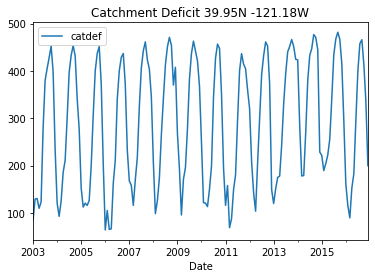

In [34]:
plot_row=7
plot_col=12
plot_lat=lat_df.to_numpy(copy=True).item(plot_row,plot_col)
plot_lon=lon_df.to_numpy(copy=True).item(plot_row,plot_col)
#cdSeries=pd.series(getCatDeffArrArLoc(plot_row,plot_col))
dti = pd.date_range("2003/01/01", end="2016/12/31", freq="M")
cd_data=getCatDeffArrArLoc(plot_row,plot_col)
df = pd.DataFrame(columns=['Date','catdef'])
df['Date']=dti
df['catdef']=cd_data
df.set_index('Date').plot(title=f'Catchment Deficit {plot_lat}N {plot_lon}W')

In [7]:
def getHPredRowsAtLoc(x_idx,y_idx,h,min_month=145,d="catdef_extraction_6mo",reset_to_zero_idx=True):
    #here, x, y are 0-based
    path_to_file=f"{d}/catdef.catdef_row.{x_idx}.col.{y_idx}.csv.preds.csv"
    if(not(os.path.exists(path_to_file))):
        #print(f"At x={x_idx}, y={y_idx}, file {path_to_file} not found .")
        return None
    else:
        #print(f"reading from file {path_to_file}")
        all_rows=pd.read_csv(path_to_file, sep=",")
        rows_with_h=all_rows[all_rows.apply(lambda row:row['pred_month']-row['end_month']==h,axis=1)]
        pred_and_month=rows_with_h[['Point.Forecast','pred_month']]
        pred_and_month=pred_and_month[pred_and_month.apply(lambda row:row['pred_month']>=min_month,axis=1)]
        #the month idx in the DF are 1-based.  
        if(reset_to_zero_idx):
            month_vals=pred_and_month['pred_month'].tolist()
            zbi_month_vals=[m-1 for m in month_vals]
            pred_and_month['pred_month']=zbi_month_vals
        return pred_and_month
        
def getAvgRMSEAtLoc(x_idx,y_idx,h,min_month=145,d="catdef_extraction_6mo",defaultRMSE=100):
    #first get the pred_df
    #NOTE that the getHPredRowsAtLoc adjusts pred_month by substracting one because 
    #  reset_to_zero_idx is default True
    pred_df=getHPredRowsAtLoc(x_idx,y_idx,h,min_month=min_month,d=d)
    #pred_df has months which are now 0-indexed
    if(pred_df is None):
        return defaultRMSE
    obs_data=getCatDeffArrArLoc(x_idx,y_idx)
    #obs data is zero-indexed ; indices in R are 1-indexed
    residuals=pred_df.apply(lambda row:float(obs_data[int(row['pred_month'])])-float(row['Point.Forecast']),axis=1).tolist()
    #print(f"resids are {residuals}")
    sq_resids=[r*r for r in residuals]
    rmse=np.sqrt(sum(sq_resids)/float(len(sq_resids)))
    #print(f"RMSE at {x_idx},{y_idx} is {rmse}")
    return rmse
    
    

## STEP 3.  Explore Predictions w 6-mo Horizon Preds (No lambda=auto)

Compute RMSE for each grid location and plot each as a map of RMSE values.

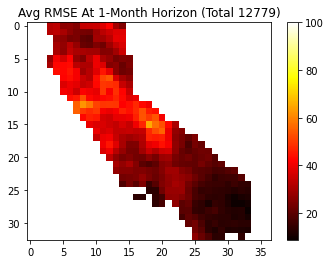

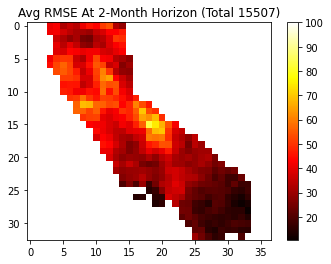

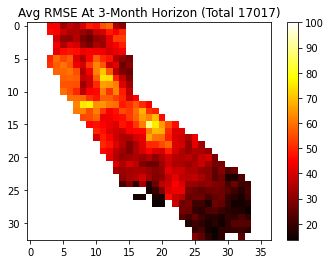

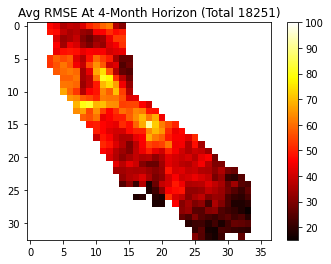

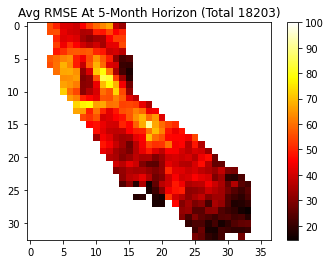

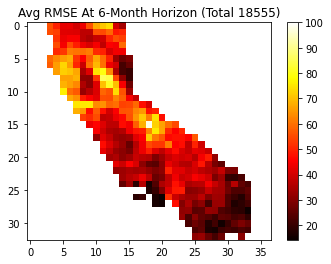

In [9]:
mos_back=[1,2,3,4,5,6]
rmse_sums_no_lambda=list()
for m in mos_back:
    rmse_sum_this_month=0
    catdef_dims=pdata.apply(lambda row:row['catdef'].shape,axis=1).tolist()[0]
    all_rmse=list()
    for row_idx in range(catdef_dims[0]):
        rmses_this_row=list()
        for col_idx in range(catdef_dims[1]):
            rmse_val=getAvgRMSEAtLoc(row_idx,col_idx,m)
            #rmse_vals.put([row_idx,col_idx],rmse_val)
            if(row_idx==0 and col_idx==catdef_dims[1]-1):
                rmse_val=100
            rmses_this_row.append(rmse_val)
            if(rmse_val!=100):
                #print(f"found a valid at {row_idx},{col_idx}")
                rmse_sum_this_month=rmse_sum_this_month+rmse_val
            else:
                pass
                #print(f"found invalid at {row_idx},{col_idx}")
        all_rmse.append(rmses_this_row)
    plt.imshow(all_rmse, cmap='hot', interpolation='nearest')
    plt.title(f"Avg RMSE At {m}-Month Horizon (Total {int(rmse_sum_this_month)})")
    rmse_sums_no_lambda.append(rmse_sum_this_month)
    plt.colorbar()
    plt.show()
    #print(rmse_vals)

## STEP 4.  Explore Predictions w 6-mo Horizon Preds (lambda=auto)

Compute RMSE for each grid location and plot each as a map of RMSE values.

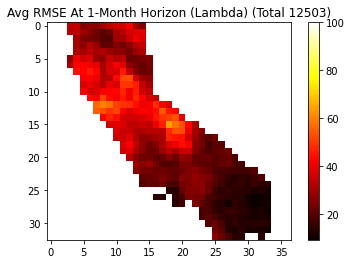

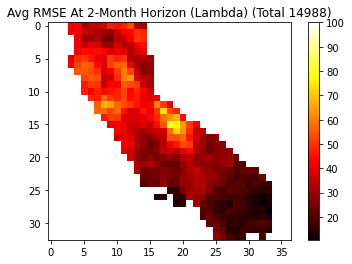

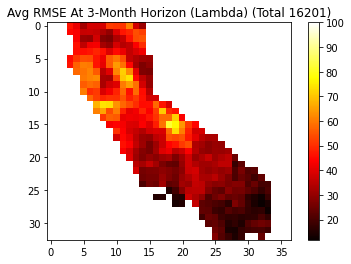

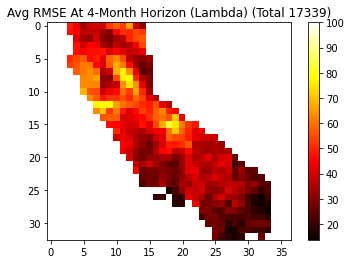

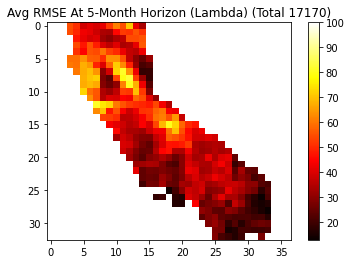

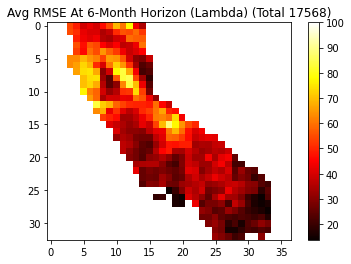

In [10]:
mos_back=[1,2,3,4,5,6]
rmse_sums_lambda=list()
for m in mos_back:
    rmse_sum_this_month=0
    catdef_dims=pdata.apply(lambda row:row['catdef'].shape,axis=1).tolist()[0]
    all_rmse=list()
    for row_idx in range(catdef_dims[0]):
        rmses_this_row=list()
        for col_idx in range(catdef_dims[1]):
            rmse_val=getAvgRMSEAtLoc(row_idx,col_idx,m,d="catdef_extraction_6mo_lambda")
            #rmse_vals.put([row_idx,col_idx],rmse_val)
            if(row_idx==0 and col_idx==catdef_dims[1]-1):
                rmse_val=100
            rmses_this_row.append(rmse_val)
            if(rmse_val!=100):
                #print(f"found a valid at {row_idx},{col_idx}")
                rmse_sum_this_month=rmse_sum_this_month+rmse_val
            else:
                pass
                #print(f"found invalid at {row_idx},{col_idx}")            
        all_rmse.append(rmses_this_row)
    plt.imshow(all_rmse, cmap='hot', interpolation='nearest')
    plt.title(f"Avg RMSE At {m}-Month Horizon (Lambda) (Total {int(rmse_sum_this_month)})")
    rmse_sums_lambda.append(rmse_sum_this_month)
    plt.colorbar()
    plt.show()
    #print(rmse_vals)

### STEP 5.  A Simple Tabular Summary

Sums of RMSEs were tallied during their exploration/computation.  They are displayed here in tabular form.

In [20]:
from IPython.display import HTML


winners=list()
for w in range(len(rmse_sums_no_lambda)):
    if(rmse_sums_no_lambda[w]>rmse_sums_lambda[w]):
        winners.append("Lambda")
    else:
        winners.append("NoLambda")
sum_sumdf=pd.DataFrame.from_dict(
    {'NoLambdaErrs':[int(e) for e in rmse_sums_no_lambda],
     'LambdaErrs' : [int(e) for e in rmse_sums_lambda]
     #'Winner': winners    
    })
HTML(sum_sumdf.to_html(index=False))

NoLambdaErrs,LambdaErrs
12779,12503
15507,14988
17017,16201
18251,17339
18203,17170
18555,17568
